# Esercizi - Alte prestazioni nel calcolo matriciale

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import time
from timeit import timeit, default_timer

from numba import jit

## Esperimento: verifichiamo che gli accessi per colonne o per righe di una matrice nxn hanno tempi di calcolo molto differenti

In [3]:
@jit(nopython=True)
def accesso_per_righe(A,B):
    n = A.shape[0]
    C = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
                C[i,j] = A[i,j] * B[i,j] 
        #endfor
    #endfor
    return

In [4]:
@jit(nopython=True)
def accesso_per_colonne(A,B):
    n = A.shape[0]
    C = np.zeros((n,n))
    for j in range(n):
        for i in range(n):
                C[i,j] = A[i,j] * B[i,j] 
        #endfor
    #endfor
    return

In [5]:
n = 10000
A = np.random.rand(n,n)
B = np.random.rand(n,n)

# eseguiamo la routine "accesso_per_righe()" precedentemente compilata con Numba: 
t_i = default_timer()
accesso_per_righe(A,B)
t_f = default_timer()
print("Tempo di esecuzione accesso_per_righe  = ", t_f - t_i, "s")

# eseguiamo la routine "accesso_per_colonne()" precedentemente compilata con Numba: 
t_i = default_timer()
accesso_per_colonne(A,B)
t_f = default_timer()
print("Tempo di esecuzione accesso_per_colonne  = ", t_f - t_i, "s")

Tempo di esecuzione accesso_per_righe  =  1.5655141999886837 s
Tempo di esecuzione accesso_per_colonne  =  7.669670399976894 s


## Esercizio: scelta della dimensione ottimale dei blocchi
Utilizzando la routine "LEVEL3_gemm" del notebook usato nel video, data una dimensione n=10000 delle matrici nxn, calcolare i tempi del prodotto di matrici per vari Nq e determinare il numero di blocchi ottimale per il proprio PC. Attenzione: i tempi di esecuzione potrebbero arrivare ad alcuni minuti.

In [6]:
@jit(nopython=True)
def LEVEL3_gemm(A,B,C,Nq):
    # prodotto di matrici con operazioni BLAS 3:
    n = A.shape[0]
    dimb = n / Nq
    for i in range(Nq):
        for j in range(Nq):
            for k in range(Nq):
                C[i*dimb:(i+1)*dimb,j*dimb:(j+1)*dimb] += \
                      A[i*dimb:(i+1)*dimb,k*dimb:(k+1)*dimb] @ \
                      B[k*dimb:(k+1)*dimb,j*dimb:(j+1)*dimb]  # prodotto di matrici (BLAS 3)
            #endfor
        #endfor
    #endfor
    return

Per Nq =  2  si ha t =  27.82970440000645  s
Per Nq =  5  si ha t =  31.538541800022358  s
Per Nq =  8  si ha t =  51.86062989998027  s
Per Nq =  10  si ha t =  35.59542340002372  s
Per Nq =  25  si ha t =  105.7387097000028  s
Per Nq =  50  si ha t =  123.63198430000921  s
Per Nq =  100  si ha t =  150.87036319999606  s
Per Nq =  200  si ha t =  264.94002740000724  s


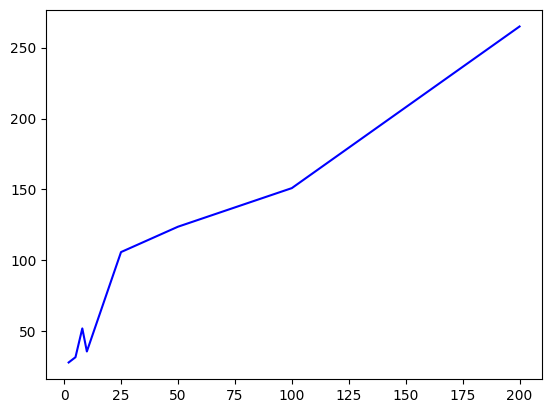

In [9]:
n = 10000
A = np.random.rand(n,n)
B = np.random.rand(n,n)
# consideriamo numeri non troppo grandi poichè altrimenti prenderemo un numero
# alto di blocchi che renderebbe inefficiente l'algoritmo
test = [2,5,8,10,25,50,100,200]
tempi = np.zeros(len(test))

for i in range(len(test)): 
    Nq = test[i]
    C = np.zeros((n,n))
    t_i = default_timer()
    LEVEL3_gemm(A,B,C,Nq)
    t_f = default_timer()
    tempi[i] = t_f - t_i
    print("Per Nq = ", Nq," si ha t = ", tempi[i]," s")


# Rappresentazione
plt.figure(1)
plt.plot(test,tempi,'b-')
plt.show()

Più il numero di blocchi è basso, più l'algoritmo si avvicina all'operazione standard A @ B quindi l'operazione BLAS3 da noi definita, molto probabilmente sarà ottimale per Nq=(il più piccolo divisore di n), escludendo 1 poichè altrimenti sarebbe uguale a A @ B.